In [34]:
import matplotlib.pyplot as plotlib
import numpy as np
import seaborn as sns

In [3]:
def plot_heat_map(env, index):
    plotlib.pcolor(env)
    plotlib.gca().invert_yaxis()
    plotlib.title(f"Reward Function {index} Heat Map")
    plotlib.colorbar()
    plotlib.axis('equal')
    plotlib.show()

In [42]:
def rf1():
    rows, cols = 10, 10
    env = np.zeros((rows, cols))
    to_mark = [(2, 5), (2, 6), (3, 5), (3, 6), (4, 1), 
               (4, 2), (5, 1), (5, 2), (8, 2), (8, 3), 
               (9, 2), (9, 3)]
    
    for i in to_mark:
        env[i] = -10
    env[(9, 9)] = 1

    return env
    
def rf2():
    rows, cols = 10, 10
    env = np.zeros((rows, cols))
    to_mark = [(1, 4), (1, 5), (1, 6), (2, 4), (2, 6),
               (3, 4), (3, 6), (3, 7), (3, 8), (4, 4), 
               (4, 8), (5, 4), (5, 8), (6, 4), (6, 8),
               (7, 6), (7, 7), (7, 8), (8, 6)]
    
    for i in to_mark:
        env[i] = -100

    return env

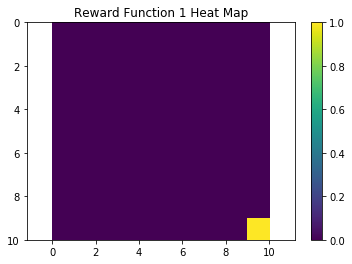

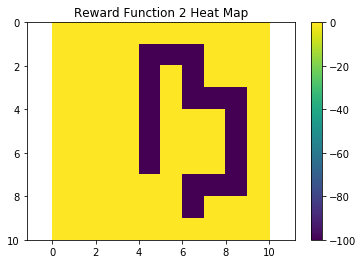

In [44]:
plot_heat_map(rf1(), 1)
plot_heat_map(rf2(), 2)

In [47]:
def transition_probability(state_space, state, neighbor, action, w, actions):
    probability = 0
    
    if action == neighbor[2]:
        probability = 1 - w + w/4
    else:
        probability = w/4
                
#     if the action points to the neighbor
#     then 1 - w + w/4
#     if the action points not at the neighbor
#     then w/4


            
    
        
    return probability
    

def neighbors(state_space, state):
    neighbor_list = [(state[0] - 1, state[1], 'U'),
                     (state[0] + 1, state[1], 'D'),
                     (state[0], state[1] - 1, 'L'),
                     (state[0], state[1] + 1, 'R'),
                     (state[0], state[1], '0')]

    for neighbor in neighbor_list:
        if (neighbor[0] < 0 or neighbor[1] < 0 or neighbor[0] > 9 or neighbor[1] > 9):
            neighbor_list.remove(neighbor)

    return neighbor_list
    
def action_scores(actions, state_space, state, rf, g, V):
    scores = dict()
    
    for action in actions:
        scores[action] = 0
        neighbor_list = neighbors(state_space, state)
        for neighbor in neighbor_list:
            prob = transition_probability(state_space, state, neighbor, action, w, actions)
            reward = rf[state]
            scores[action] += prob * (reward + g * V[(neighbor[0], neighbor[1])])
    
    return scores
    
def optimal_state_value(state_space, actions, rf, w, g, eps):
    V = np.zeros(state_space.shape)
    
    delta = float('inf')
    
    while delta > eps:
        delta = 0
        
        for state, _ in np.ndenumerate(state_space):
            v = V[state]
            V[state] = max(action_scores(actions, state_space, state, rf, g, V).values())
            delta = max(delta, np.fabs(v - V[state]))
    
    return V
            

In [27]:
state_space = np.zeros((10, 10))
actions = ['U', 'D', 'L', 'R']
w = 0.1
g = 0.8
eps = 0.01

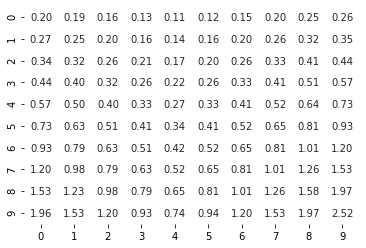

In [48]:
rf = rf1()
rf1_optimal_state_values = optimal_state_values = optimal_state_value(state_space, actions, rf, w, g, eps)

sns.heatmap(state_space, annot=rf1_optimal_state_values, fmt='.2f', cbar = False, 
            cmap=['w'])